In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from utils import plot_trajectory

# MODEL 2

In [10]:
def syntag2(y, t, tc_short, tc_long, stim_func, protein_func, stim_start, stim_stop):
    """synaptic tagging model2. time constant of voltage were modulated by dopamine function

    Parameters
    ----------
    y
        tuples of voltage and time constant to be integrated
    t
        time
    tc_short
        short time contant when dopamine does not modulating 
    tc_long
        long time constant when dopamine is modulating
    stim_func
        stimulus function of time
    protein_func
        presence of protein in function
    """
    w, gamma = y
    
    stim = stim_func(t, stim_start, stim_stop)

    f_w = (-w + stim) / gamma
    f_gamma = -gamma * (gamma - tc_long) * (gamma - tc_short) + protein_func(stim)

    return [f_w, f_gamma]

In [103]:
def stim_func(t, start, stop):
    if t > start and t <  stop:
        return 1
    return 0

def protein_func(stim):
    if stim > 0:
        return 1
    else:
        return 0

In [104]:
def integrate(tau_thr=0.25, tau_long=0.5, del_t = 0.01, max_t=15, stim_start=2, stim_stop=2.6):
    t = np.arange(0, max_t, step=del_t)
    y0 = 0.1 * np.random.random(2)

    sol = odeint(syntag2, y0, t, args=(tau_thr, tau_long, stim_func, protein_func, stim_start, stim_stop))

    return t, sol

## DURATION

In [105]:
DEL_STIM_1 = 0.4
STIM_STOP = 4
STIM_START = STIM_STOP- DEL_STIM_1
t, sol2 = integrate(tau_thr=0.5, tau_long=1, stim_start=STIM_START, stim_stop=STIM_STOP)


In [106]:
DEL_STIM_2 = 0.6
STIM_STOP = 4
STIM_START = STIM_STOP- DEL_STIM_2
t, sol2a = integrate(tau_thr=0.5, tau_long=1, stim_start=STIM_START, stim_stop=STIM_STOP)

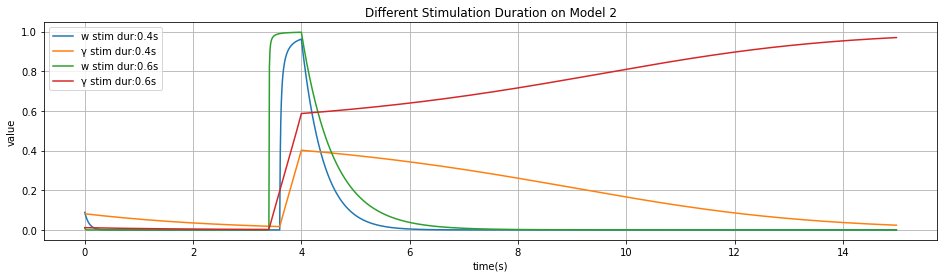

In [107]:
fig, axs = plt.subplots(1, 1, sharey=True, sharex=True)
fig.set_size_inches(16, 4)

plot_trajectory(axs, t, sol2, title = '', keys=['w stim dur:{}s'.format(DEL_STIM_1), 'γ stim dur:{}s'.format(DEL_STIM_1)])
plot_trajectory(axs, t, sol2a, title = '', keys=['w stim dur:{}s'.format(DEL_STIM_2), 'γ stim dur:{}s'.format(DEL_STIM_2)])

plt.title('Different Stimulation Duration on Model 2')
plt.grid()

## TIME CONSTANT AND THRESHOLD

In [99]:
DEL_STIM_2 = 0.5
STIM_STOP = 4
STIM_START = STIM_STOP- DEL_STIM_2

TAU_LONG = 1
TAU_THR = 0.5
t, sol3 = integrate(tau_thr=TAU_THR, tau_long=TAU_LONG, stim_start=STIM_START, stim_stop=STIM_STOP)

In [100]:
TAU_LONG_1 = 0.5
TAU_THR_1 = 0.25
t, sol3a = integrate(tau_thr=TAU_THR_1, tau_long=TAU_LONG_1, stim_start=STIM_START, stim_stop=STIM_STOP)

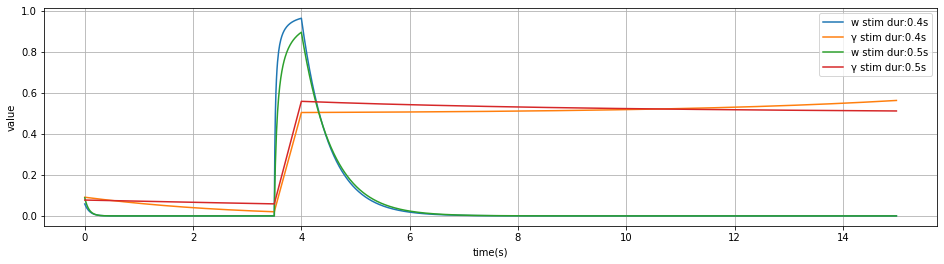

In [101]:
fig, axs = plt.subplots(1, 1, sharey=True, sharex=True)
fig.set_size_inches(16, 4)

plot_trajectory(axs, t, sol3, title = '', keys=['w stim dur:{}s'.format(DEL_STIM_1), 'γ stim dur:{}s'.format(DEL_STIM_1)])
plot_trajectory(axs, t, sol3a, title = '', keys=['w stim dur:{}s'.format(DEL_STIM_2), 'γ stim dur:{}s'.format(DEL_STIM_2)])


plt.grid()